 Lab Task 01 : Write a function to perform image thresholding using point
 processing taking the image  file and the threshold value from the user.

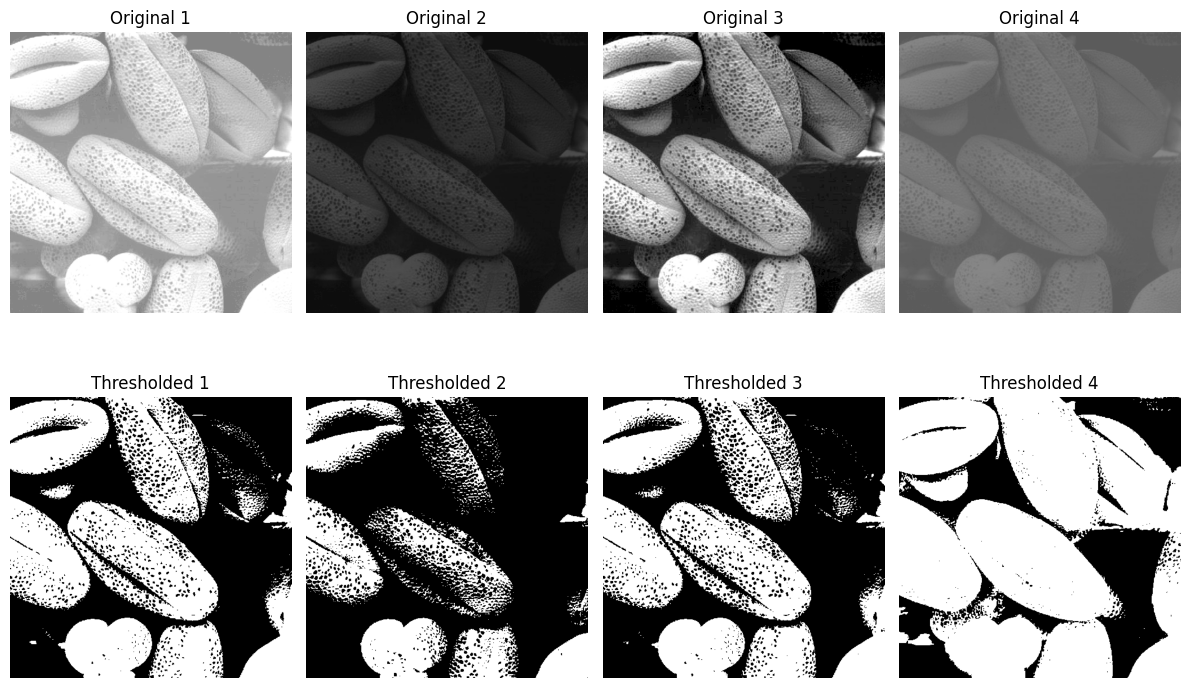

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def image_thresholding(img_path, threshold_value):
    img = cv.imread(img_path)
    ret, thresholded_img = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)
    return img, thresholded_img

# perform thresholding
images = [
    image_thresholding('/content/bright.tif', 200),
    image_thresholding('/content/dark.tif', 50),
    image_thresholding('/content/high_contrast.tif', 127),
    image_thresholding('/content/low_contrast.tif', 100)
]

# plot the images side by side
plt.figure(figsize=(12, 8))

for i, (original, thresholded) in enumerate(images):
    plt.subplot(2, len(images), i + 1)
    plt.imshow(original)
    plt.title(f'Original {i+1}')
    plt.axis('off')

    plt.subplot(2, len(images), i + 1 + len(images))
    plt.imshow(thresholded)
    plt.title(f'Thresholded {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Lab Task 02 : Read two images and perform addition and subtraction.

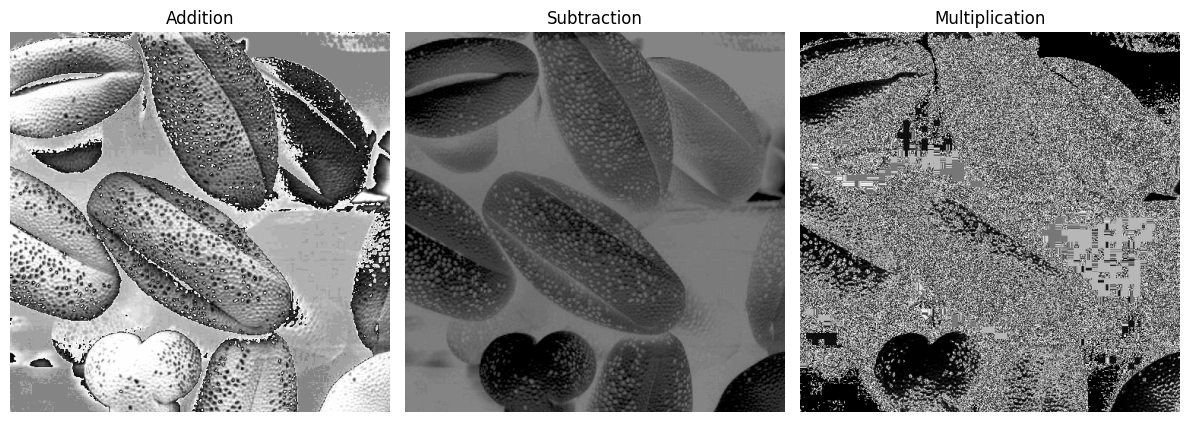

In [51]:
# arithmetic operations without inbuilt functions
img1 = cv.imread('/content/bright.tif')
img2 = cv.imread('/content/high_contrast.tif')

# perform operations
addition = img1 + img2
subtraction = img1 - img2
multiplication = img1 * img2

# plot original and operation results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(addition)
plt.title('Addition')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(subtraction)
plt.title('Subtraction')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(multiplication)
plt.title('Multiplication')
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 499.5, 499.5, -0.5)

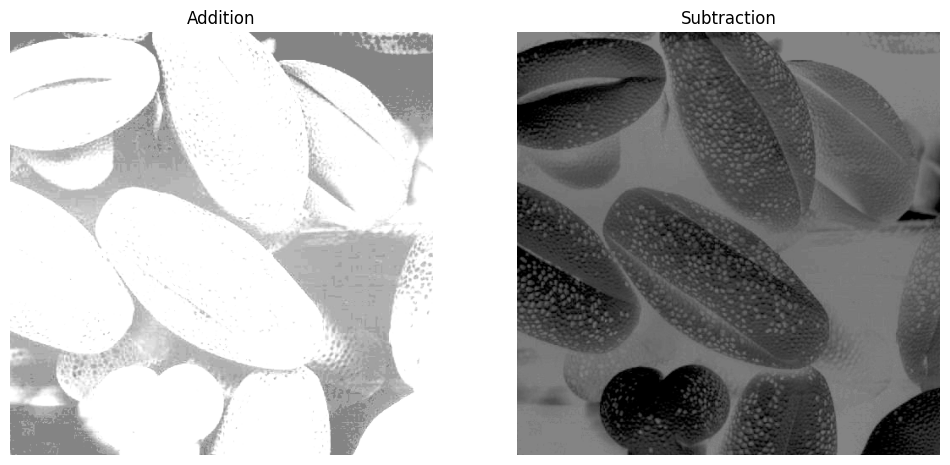

In [52]:
# arithmetic operations with using inbuilt function
# perform operations
img_add = cv.add(img1, img2)
img_sub = cv.subtract(img1, img2)

# plot original and operation results
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_add)
plt.title('Addition')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sub)
plt.title('Subtraction')
plt.axis('off')

Lab Task 03 :
 1. Write simple programs to demonstrate the following. Show the original and
 resultant images in the same figure to compare them easily.

 a. Log transformation

(-0.5, 499.5, 499.5, -0.5)

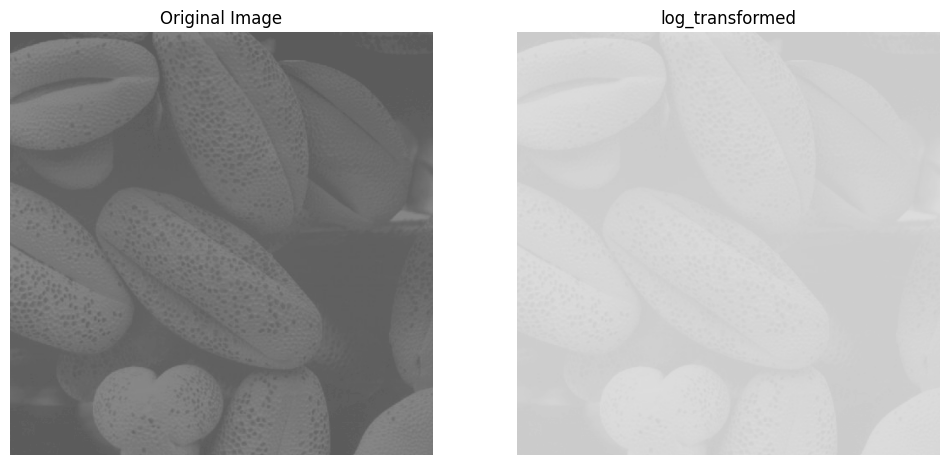

In [53]:
# load an image
image = cv.imread('/content/low_contrast.tif')
# log transformation
c = 45
log_transformed = c * (np.log(image + 1))
# convert to 8-bit unsigned integer format
log_transformed = np.uint8(log_transformed)

# display the original and log transformation side by side
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed)
plt.title("log_transformed")
plt.axis('off')

 b. Power transformation

(-0.5, 499.5, 499.5, -0.5)

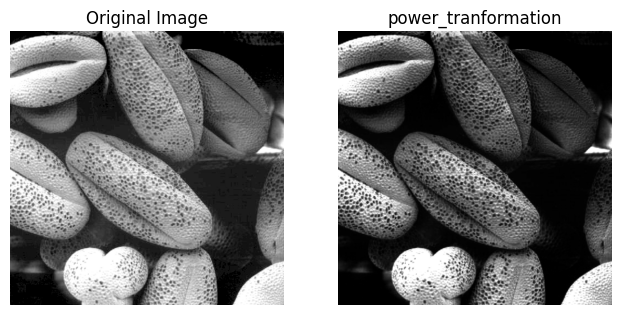

In [54]:
# load an image
image = cv.imread('/content/high_contrast.tif')
# apply gamma correction (e.g., gamma = 1.5)
gamma = 2
adjusted_image = np.power(image / 255.0, gamma) * 255.0
adjusted_image = adjusted_image.astype(np.uint8)

# display the original and power transformation side by side
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adjusted_image)
plt.title("power_tranformation")
plt.axis('off')

 c. Contrast Stretching

(-0.5, 499.5, 499.5, -0.5)

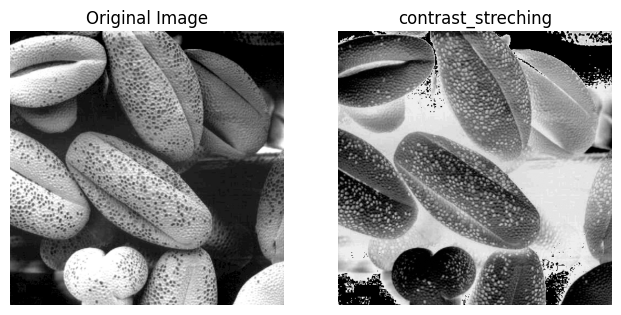

In [55]:
# load an image
image = cv.imread('/content/high_contrast.tif')

intensity_max = np.max(image)
intensity_min = np.min(image)
intensity_range = intensity_max - intensity_min
stretched = 255*(image - intensity_min)/ intensity_range

# Display the original and contrast streching side by side
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(stretched)
plt.title("contrast_streching")
plt.axis('off')

 d. Gray level slicing

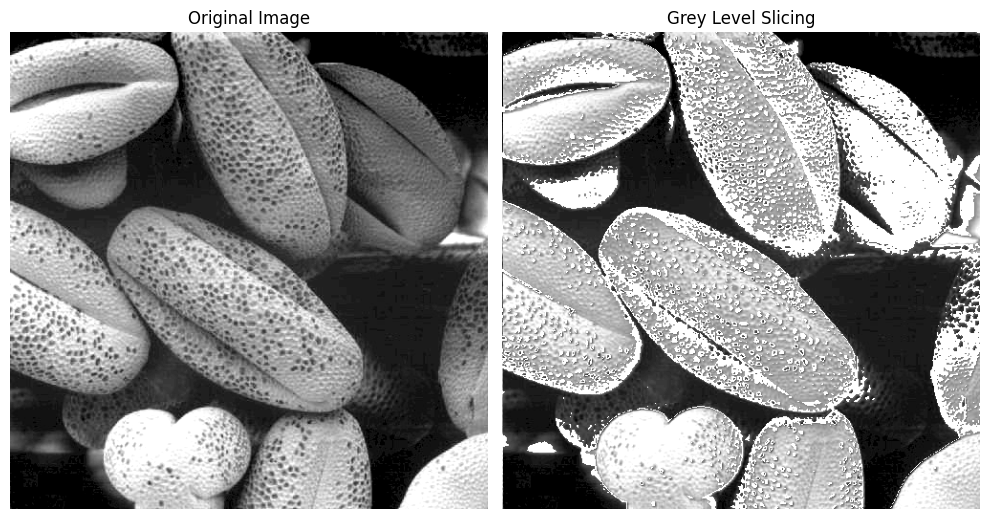

In [56]:
# load an image as grayscale
image = cv.imread('/content/high_contrast.tif', cv.IMREAD_GRAYSCALE)

# find width and height of image
row, column = image.shape

# create a zeros array to store the grey level sliced image
grey_level_sliced = np.zeros((row, column), dtype='uint8')

# specify the min and max range
min_range = 80
max_range = 140

# loop over the input image and if pixel value lies in desired range set it to 255
for i in range(row):
    for j in range(column):
        if min_range < image[i, j] < max_range:
            grey_level_sliced[i, j] = 255
        else:
            grey_level_sliced[i, j] = image[i-1, j-1]

# Display the original and grey level sliced side by side
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grey_level_sliced, cmap='gray')
plt.title("Grey Level Slicing")
plt.axis('off')

plt.tight_layout()
plt.show()


 e. Bit plane slicing

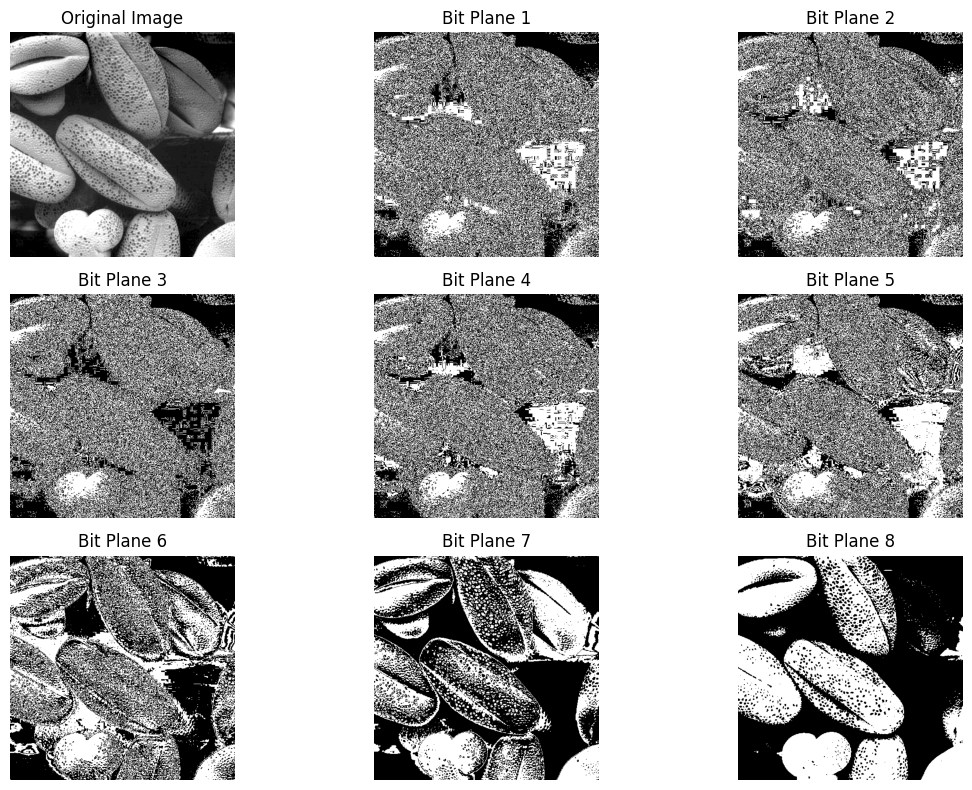

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv.imread('/content/high_contrast.tif', 0)

# Display the original image
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Bit plane slicing function
def bitPlaneSlicing(r, bit_plane):
    dec = np.binary_repr(r, width=8)  # Convert to 8-bit binary
    return int(dec[8 - bit_plane])    # Extract specific bit

# Vectorize the function to work with arrays
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing)

# Extract and display all 8 bit planes
for bit in range(1, 9):
    bit_plane_img = bitPlaneSlicingVec(image, bit_plane=bit)
    plt.subplot(3, 3, bit + 1)
    plt.imshow(bit_plane_img, cmap='gray')
    plt.title(f'Bit Plane {bit}')
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Consider the graph for a typical transformation function used for Contrast
Stretching in the given figure and determine the behavior of the function with
respect to given changes.

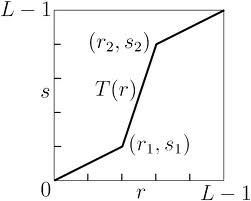

In [58]:
image = cv.imread('/content/Picture.png')
cv2_imshow(image)

a. When r1 =s1 and r2=s2

input image and output image are same in this trabformation

b. When r1=r2, s1=0 and s2=L-1

intensity values of input image that lower than r1 become 0 and higher value(black) become 255(white). that is the transition of output image. this also called as image thresholding.

Lab Task 04 : Write a program to read any image, resize it to 256x256. Apply the
masks shown in following figures so that only the middle part of the image is
visible.

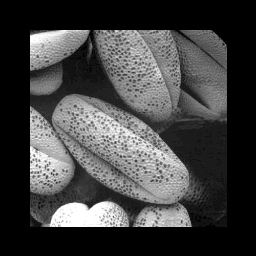

In [59]:
image = cv.imread('/content/high_contrast.tif')
resized_image = cv.resize(image, (256, 256))

# create a blank mask with the same height and width as the image
mask_rectangle = np.zeros(resized_image.shape[:2], dtype="uint8")

# draw a filled white rectangle on the mask
cv.rectangle(mask_rectangle, (30, 30), (226, 226), 255, -1)

# apply mask to the image
masked_rectangle = cv.bitwise_and(resized_image, resized_image, mask=mask_rectangle)

# Display masked image
cv2_imshow(masked_rectangle)


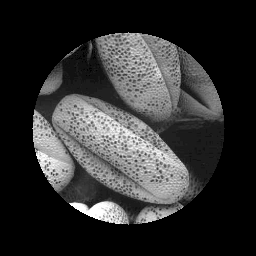

In [60]:
# create a blank mask with the same height and width as the image
mask_circle = np.zeros(resized_image.shape[:2], dtype="uint8")

# draw a filled white circle on the mask
cv.circle(mask_circle, (128, 128), 96, 255, -1)

# apply mask to the image
masked_circle = cv.bitwise_and(resized_image, resized_image, mask=mask_circle)

# Display masked image
cv2_imshow(masked_circle)

Lab Task 05 : Write your own Python OpenCV function addbrightness() and use
it to increase brightness of a given image.(Hint: Use Image arithmetic operations)

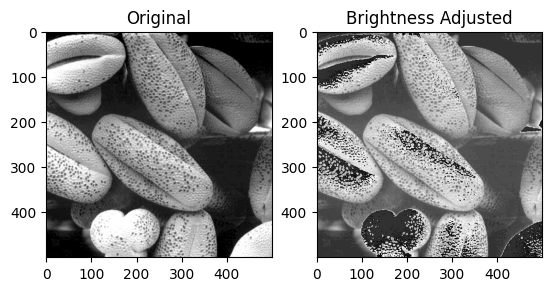

In [61]:
# Function to adjust brightness
def add_brightness(image_path, brightness_value):
    # load the image
    image = cv.imread(image_path)

    # plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # adjust the brightness by adding a constant value to each pixel
    image_brightness = image + brightness_value

    # clip the values to ensure they stay within the valid range [0, 255]
    image_brightness = np.clip(image_brightness, 0, 255)

    # convert back to uint8 type after clipping
    image_brightness = image_brightness.astype(np.uint8)

    # Plot the brightness-adjusted image
    plt.subplot(1, 2, 2)
    plt.title("Brightness Adjusted")
    plt.imshow(image_brightness)

    plt.show()

image_path = '/content/high_contrast.tif'
brightness_value = 50
add_brightness(image_path, brightness_value)


Lab Task 06 :
1. Histogram Calculation in OpenCV

Use inbuilt OpenCV cv2.calcHist() function to display the histogram of a given
image

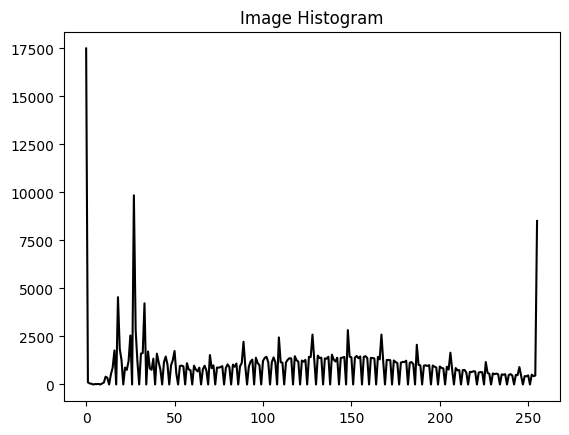

In [62]:
# read the input image in grayscale
image = cv.imread('/content/high_contrast.tif', 0)

# compute the histogram of the grayscale image
hist = cv.calcHist([image], [0], None, [256], [0, 256])

# plot the computed histogram
plt.plot(hist, color='k')
plt.title('Image Histogram')
plt.show()

2. Histogram Calculation in Numpy

Use inbuilt numpy np.histogram() function to display the histogram of a given
image

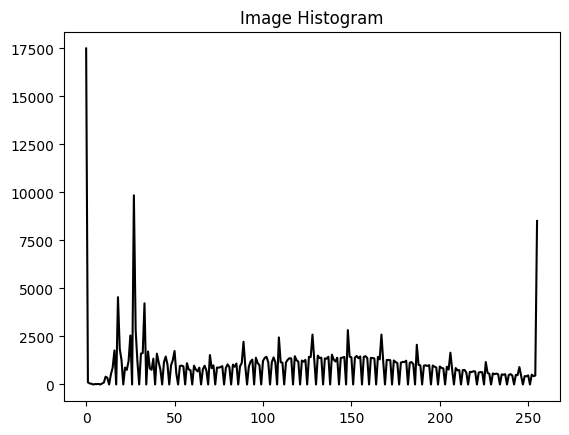

In [63]:
# load the image
image = cv.imread('/content/high_contrast.tif', 0)

# compute the histogram of the grayscale image
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

# plot the computed histogram
plt.plot(hist, color='k')
plt.title('Image Histogram')
plt.show()

3. Then write your own histogram functions for the following scenarios

a. Show a histogram plot for a grayscale image.

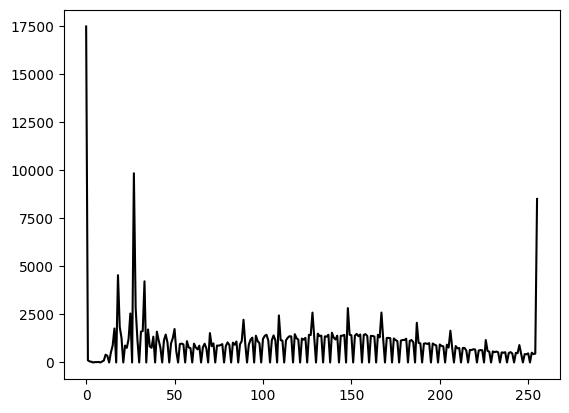

In [64]:
def show_grayscale_histogram(image_path):
    # read the image in grayscale
    img_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # compute the histogram of the grayscale image (only one channel)
    hist_gray = cv.calcHist([img_gray], [0], None, [256], [0, 256])

    # plot the histogram
    plt.plot(hist_gray, color='k')
    plt.show()

show_grayscale_histogram('/content/high_contrast.tif')

b. Show three histograms for a given RGB image.

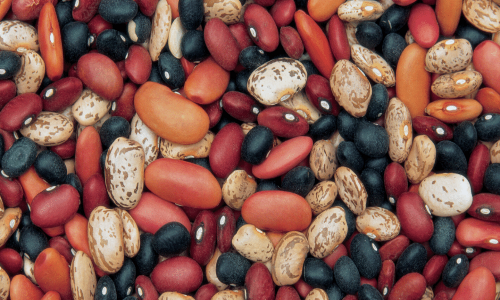

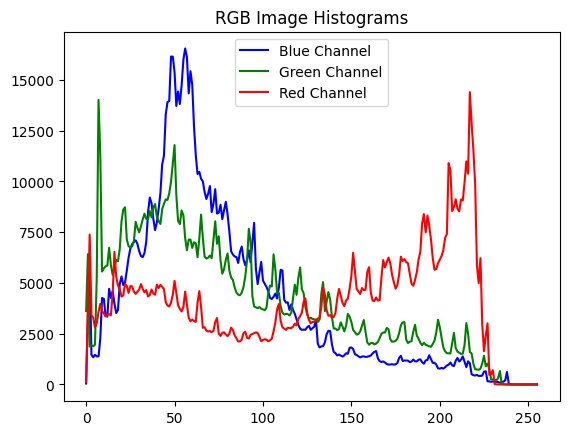

In [65]:
image = cv.imread('/content/beans.png')
resized_image = cv.resize(image, (500, 300))
cv2_imshow(resized_image)

def show_rgb_histograms(image_path):
    # read the image in color (BGR format)
    img = cv.imread(image_path)

    # split the image into its Blue, Green, and Red channels
    blue_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    red_channel = img[:, :, 2]

    # compute histograms for each channel
    blue_hist, _ = np.histogram(blue_channel, bins=256, range=(0, 255))
    green_hist, _ = np.histogram(green_channel, bins=256, range=(0, 255))
    red_hist, _ = np.histogram(red_channel, bins=256, range=(0, 255))

    # plot histograms for each channel
    plt.plot(blue_hist, color='blue', label='Blue Channel')
    plt.plot(green_hist, color='green', label='Green Channel')
    plt.plot(red_hist, color='red', label='Red Channel')

    plt.title('RGB Image Histograms')
    plt.legend()
    plt.show()

show_rgb_histograms('/content/beans.png')

4. Consider the four images given in the resources folder. Plot the histogram for each
image.

high_contrast


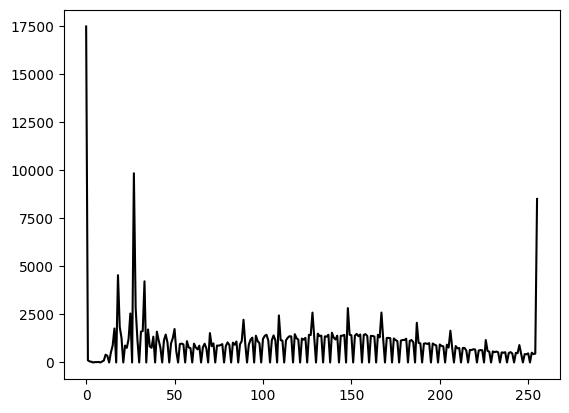

low_contrast


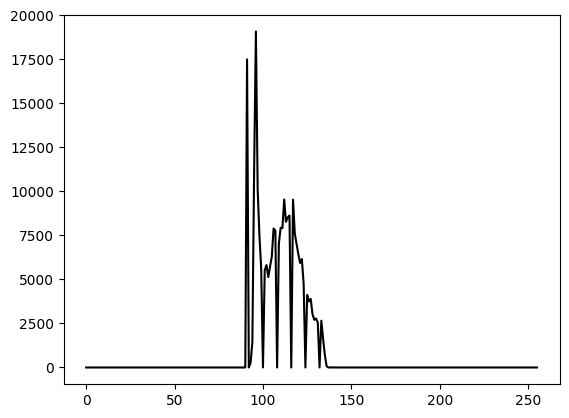

bright


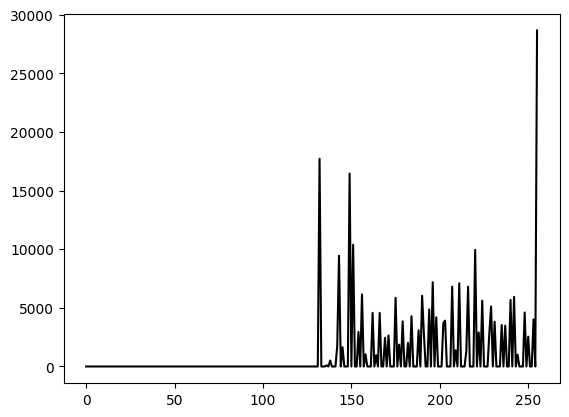

dark


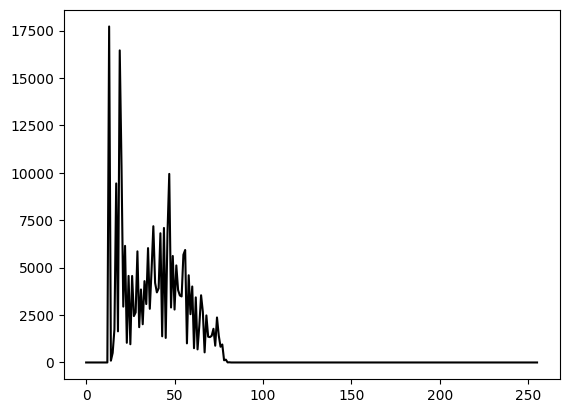

In [66]:
print("high_contrast")
show_grayscale_histogram('/content/high_contrast.tif')
print("low_contrast")
show_grayscale_histogram('/content/low_contrast.tif')
print("bright")
show_grayscale_histogram('/content/bright.tif')
print("dark")
show_grayscale_histogram('/content/dark.tif')

Perform Histogram Equalization on each image and plot the histograms of
the resultant images. Comment on the results you have obtained.

High Contrast


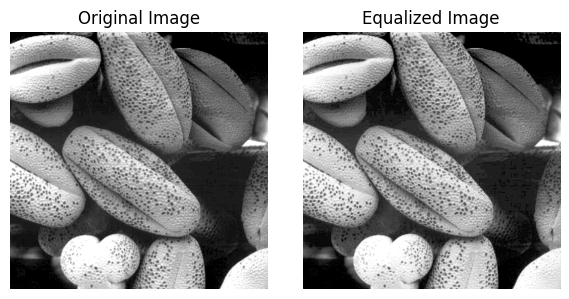

Low Contrast


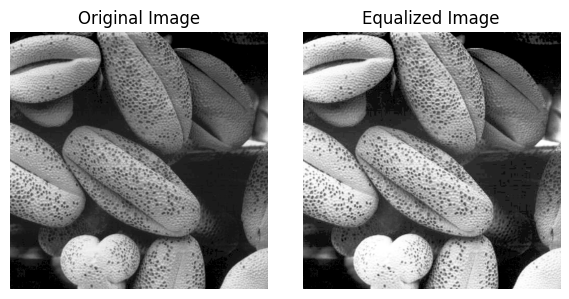

Bright


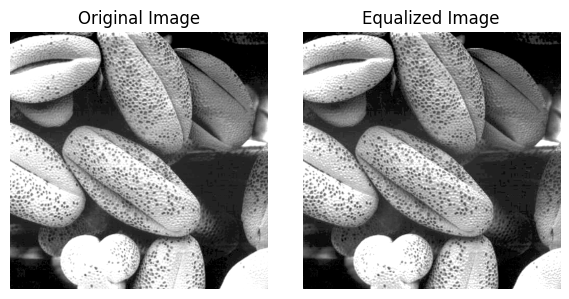

Dark


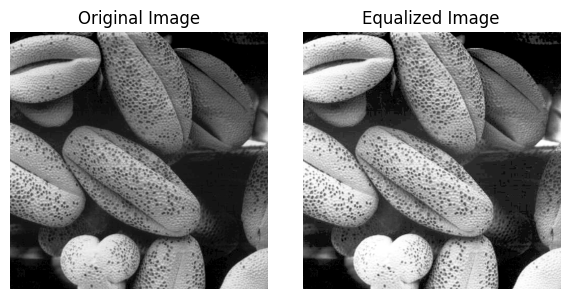

In [67]:
# Function to apply histogram equalization and plot images
def histogram_equalization(image_path):
    # Read image in grayscale
    img_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    hist_eq = cv.equalizeHist(img_gray)

    # Plot original and equalized images
    plt.figure(figsize=(6, 3))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot equalized image
    plt.subplot(1, 2, 2)
    plt.imshow(hist_eq, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Apply to different images
print("High Contrast")
histogram_equalization('/content/high_contrast.tif')
print("Low Contrast")
histogram_equalization('/content/low_contrast.tif')
print("Bright")
histogram_equalization('/content/bright.tif')
print("Dark")
histogram_equalization('/content/dark.tif')
